In [80]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import datetime
from utilsTorch import *
from dataset import *
from model import *


print(idx2label)
print(label2idx)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"
print(device)

{0: 'aeroplane', 1: 'bicycle', 2: 'bird', 3: 'boat', 4: 'bottle', 5: 'bus', 6: 'car', 7: 'cat', 8: 'chair', 9: 'cow', 10: 'diningtable', 11: 'dog', 12: 'horse', 13: 'motorbike', 14: 'person', 15: 'pottedplant', 16: 'sheep', 17: 'sofa', 18: 'train', 19: 'tvmonitor'}
{'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11, 'horse': 12, 'motorbike': 13, 'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}
cpu


In [2]:
voc_train_2007 = torchvision.datasets.VOCDetection(root="voc",year="2007",image_set="trainval",download=False)
voc_train_2012  = torchvision.datasets.VOCDetection(root="voc",year="2012",image_set="train",download=False)
voc_val = torchvision.datasets.VOCDetection(root="voc",year="2012",image_set="val",download=False)
voc_test = torchvision.datasets.VOCDetection(root="voc",year="2007",image_set="test",download=False)

In [3]:
t1=datetime.datetime.now()
voc_train_2007_annotations = createLabels(voc_train_2007)
t2=datetime.datetime.now()
diff = t2-t1   
print(f"Elapsed time is : {diff.total_seconds()} seconds ")

print(voc_train_2007_annotations.shape)

Elapsed time is : 72.659507 seconds 
(5011, 7, 7, 30)


In [4]:
t1=datetime.datetime.now()
voc_train_2012_annotations = createLabels(voc_train_2012)
t2=datetime.datetime.now()
diff = t2-t1   
print(f"Elapsed time is : {diff.total_seconds()} seconds ")

print(voc_train_2012_annotations.shape)

Elapsed time is : 66.464973 seconds 
(5717, 7, 7, 30)


In [5]:
voc_train_names = voc_train_2007.images
voc_train_images = voc_train_2007.images+voc_train_2012.images
voc_train_annotations = np.append(voc_train_2007_annotations,voc_train_2012_annotations,axis=0)

In [6]:
t1=datetime.datetime.now()
voc_val_annotations = createLabels(voc_val)
t2=datetime.datetime.now()
diff = t2-t1   
print(f"Elapsed time is : {diff.total_seconds()} seconds ")

print(voc_val_annotations.shape)

Elapsed time is : 64.785964 seconds 
(5823, 7, 7, 30)


In [7]:
t1=datetime.datetime.now()
voc_test_annotations = createLabels(voc_test)
t2=datetime.datetime.now()
diff = t2-t1   
print(f"Elapsed time is : {diff.total_seconds()} seconds ")

print(voc_test_annotations.shape)

Elapsed time is : 66.27379 seconds 
(4952, 7, 7, 30)


0 voc\VOCdevkit\VOC2007\JPEGImages\000005.jpg torch.Size([3, 448, 448]) torch.Size([7, 7, 30])


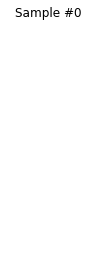

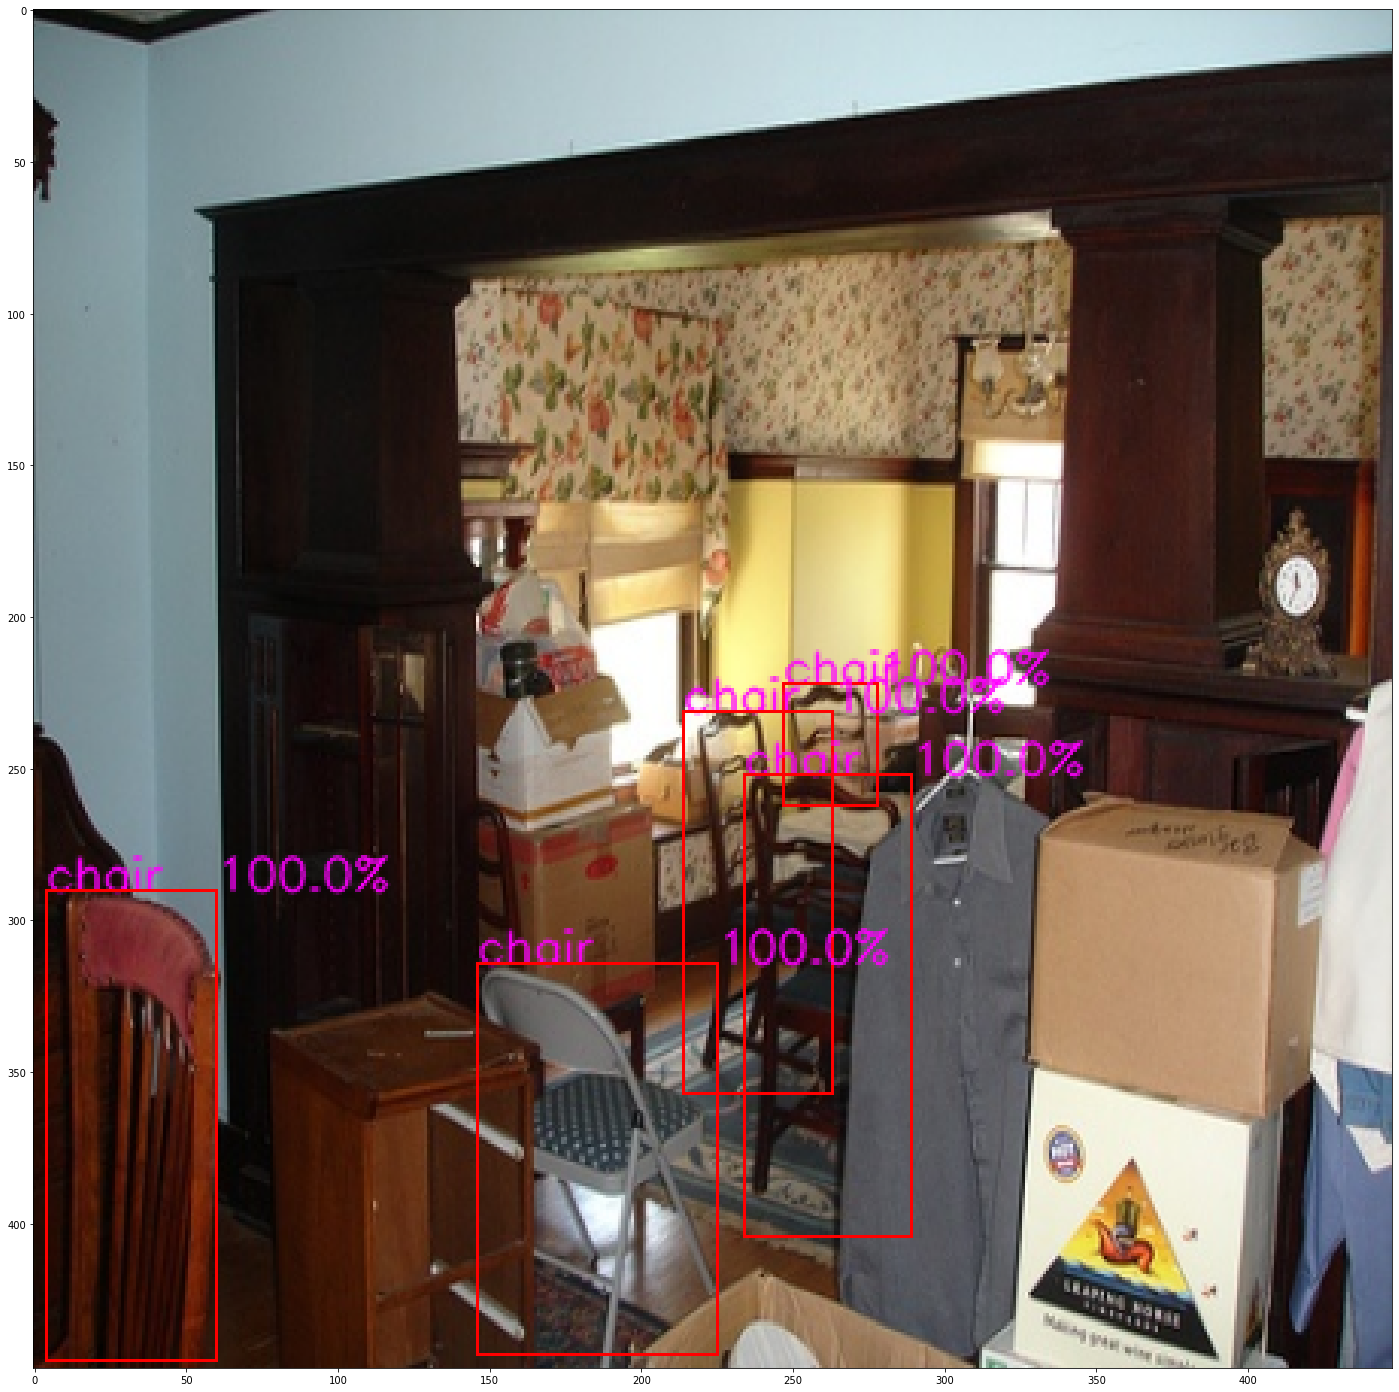

1 voc\VOCdevkit\VOC2007\JPEGImages\000007.jpg torch.Size([3, 448, 448]) torch.Size([7, 7, 30])


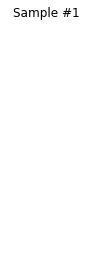

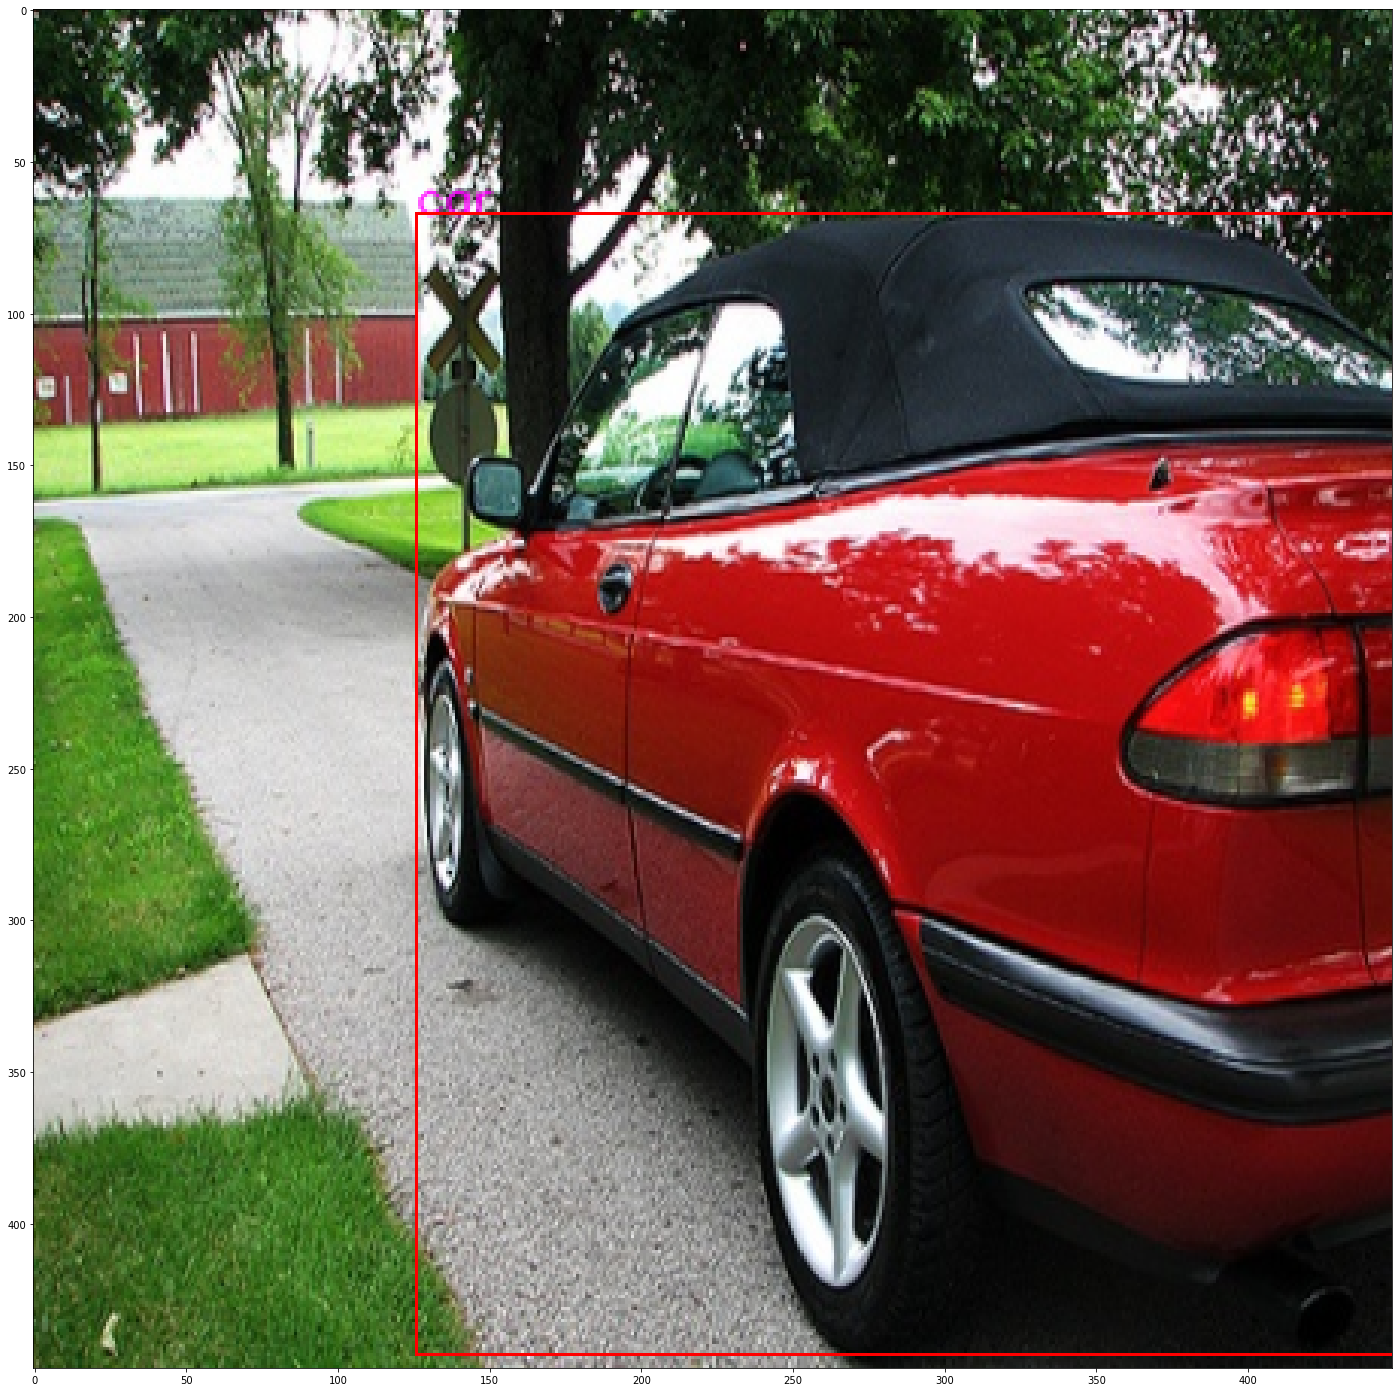

2 voc\VOCdevkit\VOC2007\JPEGImages\000009.jpg torch.Size([3, 448, 448]) torch.Size([7, 7, 30])


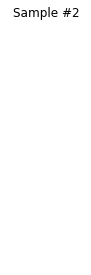

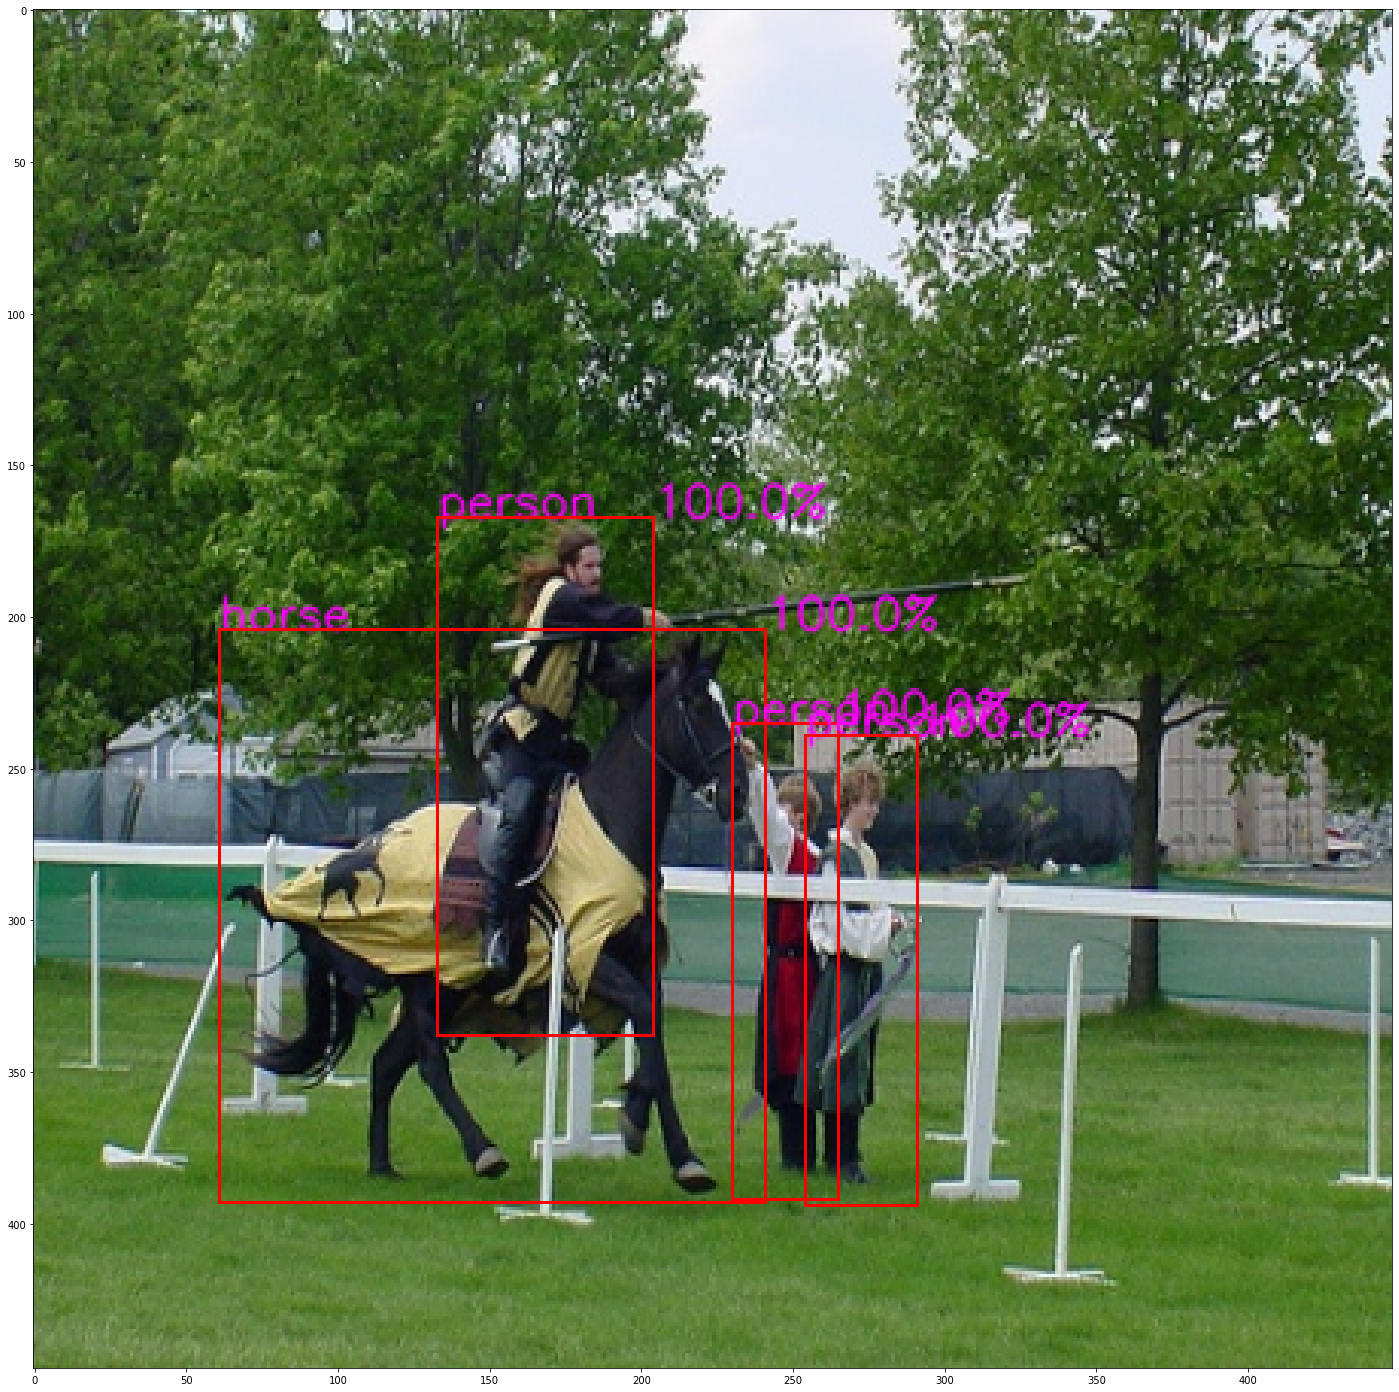

3 voc\VOCdevkit\VOC2007\JPEGImages\000012.jpg torch.Size([3, 448, 448]) torch.Size([7, 7, 30])


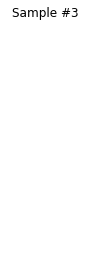

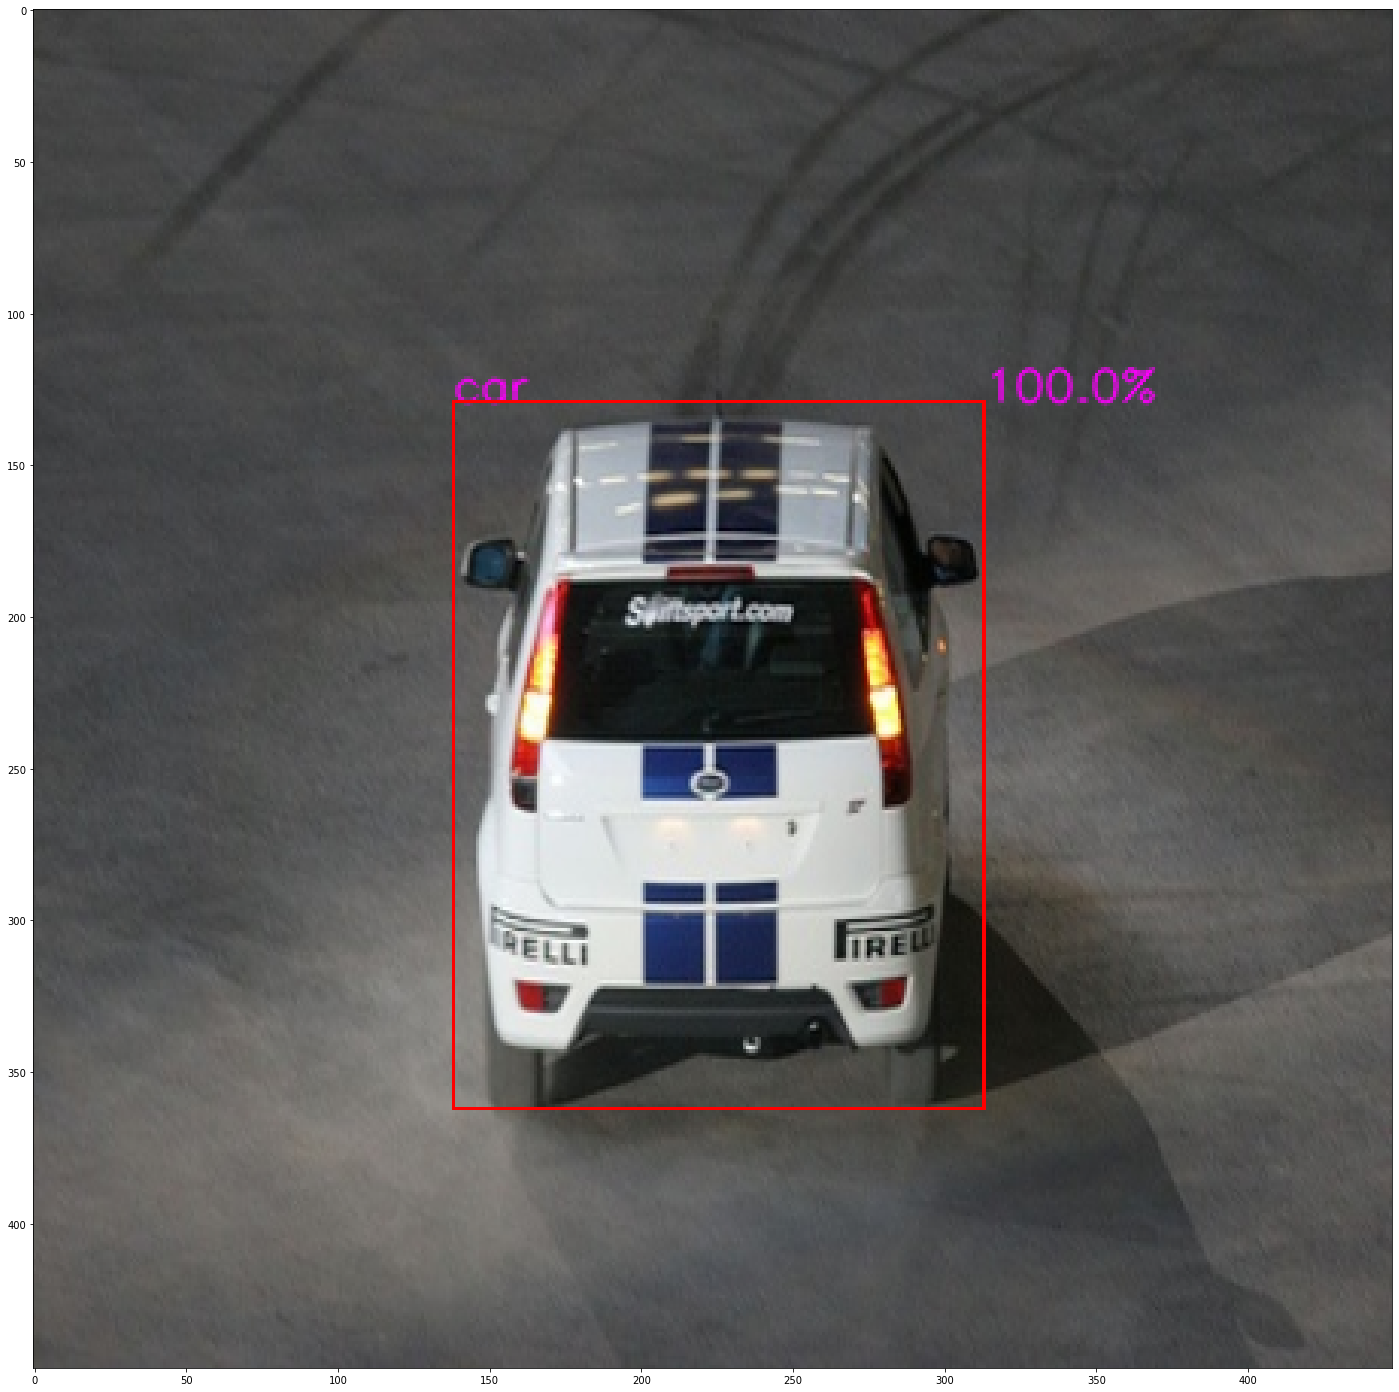

In [8]:
train = VOCDataset(voc_train_annotations,voc_train_images,transform=transforms.Compose([
                                               Rescale(new_size),ToTensor()
                                           ]))
val = VOCDataset(voc_val_annotations,voc_val.images,transform=transforms.Compose([
                                               Rescale(new_size),ToTensor()
                                           ]))

test = VOCDataset(voc_test_annotations,voc_test.images,transform=transforms.Compose([
                                               Rescale(new_size),
                                            ToTensor()
                                           ]))
data = train
fig = plt.figure()

for i in range(len(data)):
    sample = data[i]

    print(i,sample['name'], sample['image'].shape, sample['annotation'].shape)

    ax = plt.subplot(1, 4, i + 1)
    plt.tight_layout()
    ax.set_title('Sample #{}'.format(i))
    ax.axis('off')
    showSample(sample)

    if i == 3:
        plt.show()
        break

0 64 torch.Size([64, 3, 448, 448]) torch.Size([64, 7, 7, 30])
1 64 torch.Size([64, 3, 448, 448]) torch.Size([64, 7, 7, 30])
2 64 torch.Size([64, 3, 448, 448]) torch.Size([64, 7, 7, 30])
3 64 torch.Size([64, 3, 448, 448]) torch.Size([64, 7, 7, 30])


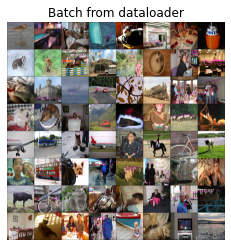

In [9]:
batch_size = 64
epochs = 5
trainLoaders = {}


trainLoader = DataLoader(train, batch_size,
                        shuffle=True, num_workers=2)

valLoader = DataLoader(val, batch_size,
                        shuffle=True, num_workers=2)

testLoader = DataLoader(test, batch_size=batch_size,
                        shuffle=False, num_workers=2)


trainLoaders["train"] = trainLoader
trainLoaders["val"] = valLoader

for i_batch, sample_batched in enumerate(trainLoader):
    print(i_batch, len(sample_batched['name']),
          sample_batched['image'].size(),
            sample_batched['annotation'].size())

    if i_batch == 3:
        plt.figure()
        show_annotations_batch(sample_batched)
        plt.axis('off')
        plt.ioff()
        plt.show()
        break

In [10]:
modelName = "mobilenet"
model = YOLOv1(modelName).to(device)

In [11]:
optimizer = optim.Adam(model.parameters(),lr = 0.0001)

In [12]:
params_to_update = model.parameters()
print("Params to learn:")
s = 0
params_to_update = []
for name,param in model.named_parameters():
    if param.requires_grad == True:
        params_to_update.append(param)
        s+=param.data.reshape(-1).shape[0]
        print("\t",name)

print(s)

Params to learn:
	 conv.0.weight
	 conv.0.bias
	 conv.1.weight
	 conv.1.bias
	 conv.2.weight
	 conv.2.bias
	 conv.3.weight
	 conv.3.bias
	 conv.4.weight
	 conv.4.bias
	 conv.5.weight
	 conv.5.bias
	 fc1.weight
	 fc1.bias
	 predictor.weight
	 predictor.bias
50337214


In [ ]:
model.load_state_dict(torch.load("trained/mobilenet"))
model = train_model(model,trainLoaders,optimizer,5,device = device,isSave=True,filename=modelName)

In [17]:
loss,(t_dict,p_dict) = test_model(model,valLoader)

  1%|▉                                                                                  | 1/91 [00:10<16:07, 10.75s/it]

 Iteration Loss: 244.44073486328125 , Average Precision : 0.0


  2%|█▊                                                                                 | 2/91 [00:17<12:12,  8.23s/it]

 Iteration Loss: 193.11236572265625 , Average Precision : 0.0


  3%|██▋                                                                                | 3/91 [00:23<10:52,  7.42s/it]

 Iteration Loss: 216.85299682617188 , Average Precision : 0.0


  4%|███▋                                                                               | 4/91 [00:30<10:17,  7.10s/it]

 Iteration Loss: 243.948486328125 , Average Precision : 0.0


  5%|████▌                                                                              | 5/91 [00:36<09:53,  6.91s/it]

 Iteration Loss: 227.4249725341797 , Average Precision : 0.0


  7%|█████▍                                                                             | 6/91 [00:43<09:36,  6.78s/it]

 Iteration Loss: 182.67938232421875 , Average Precision : 0.0


  8%|██████▍                                                                            | 7/91 [00:50<09:25,  6.73s/it]

 Iteration Loss: 180.60079956054688 , Average Precision : 0.0


  9%|███████▎                                                                           | 8/91 [00:56<09:16,  6.70s/it]

 Iteration Loss: 251.48316955566406 , Average Precision : 0.0


 10%|████████▏                                                                          | 9/91 [01:03<09:09,  6.70s/it]

 Iteration Loss: 283.1829833984375 , Average Precision : 0.0


 11%|█████████                                                                         | 10/91 [01:09<09:00,  6.67s/it]

 Iteration Loss: 212.26702880859375 , Average Precision : 0.0


 12%|█████████▉                                                                        | 11/91 [01:16<08:56,  6.71s/it]

 Iteration Loss: 195.24258422851562 , Average Precision : 0.0


 13%|██████████▊                                                                       | 12/91 [01:24<09:07,  6.93s/it]

 Iteration Loss: 199.42135620117188 , Average Precision : 0.0


 14%|███████████▋                                                                      | 13/91 [01:30<08:56,  6.88s/it]

 Iteration Loss: 248.37411499023438 , Average Precision : 0.0


 15%|████████████▌                                                                     | 14/91 [01:37<08:43,  6.80s/it]

 Iteration Loss: 221.0870819091797 , Average Precision : 0.0


 16%|█████████████▌                                                                    | 15/91 [01:44<08:29,  6.71s/it]

 Iteration Loss: 237.52023315429688 , Average Precision : 0.0


 18%|██████████████▍                                                                   | 16/91 [01:50<08:20,  6.68s/it]

 Iteration Loss: 217.73248291015625 , Average Precision : 0.0


 19%|███████████████▎                                                                  | 17/91 [01:57<08:12,  6.66s/it]

 Iteration Loss: 156.45777893066406 , Average Precision : 0.0


 20%|████████████████▏                                                                 | 18/91 [02:03<08:04,  6.63s/it]

 Iteration Loss: 214.54440307617188 , Average Precision : 0.0


 21%|█████████████████                                                                 | 19/91 [02:10<07:56,  6.61s/it]

 Iteration Loss: 220.4180145263672 , Average Precision : 0.0


 22%|██████████████████                                                                | 20/91 [02:17<07:49,  6.61s/it]

 Iteration Loss: 219.90066528320312 , Average Precision : 0.0


 23%|██████████████████▉                                                               | 21/91 [02:23<07:44,  6.64s/it]

 Iteration Loss: 225.81170654296875 , Average Precision : 0.0


 24%|███████████████████▊                                                              | 22/91 [02:30<07:42,  6.70s/it]

 Iteration Loss: 220.40428161621094 , Average Precision : 0.0


 25%|████████████████████▋                                                             | 23/91 [02:37<07:31,  6.64s/it]

 Iteration Loss: 219.4619140625 , Average Precision : 0.0


 26%|█████████████████████▋                                                            | 24/91 [02:43<07:23,  6.61s/it]

 Iteration Loss: 224.45816040039062 , Average Precision : 0.0


 27%|██████████████████████▌                                                           | 25/91 [02:50<07:23,  6.71s/it]

 Iteration Loss: 200.6941680908203 , Average Precision : 0.0


 29%|███████████████████████▍                                                          | 26/91 [02:57<07:19,  6.76s/it]

 Iteration Loss: 176.6825714111328 , Average Precision : 0.0


 30%|████████████████████████▎                                                         | 27/91 [03:05<07:33,  7.08s/it]

 Iteration Loss: 227.82952880859375 , Average Precision : 0.0


 31%|█████████████████████████▏                                                        | 28/91 [03:12<07:20,  6.99s/it]

 Iteration Loss: 178.10438537597656 , Average Precision : 0.0


 32%|██████████████████████████▏                                                       | 29/91 [03:18<07:05,  6.86s/it]

 Iteration Loss: 236.7125701904297 , Average Precision : 0.0


 33%|███████████████████████████                                                       | 30/91 [03:25<06:55,  6.81s/it]

 Iteration Loss: 222.6289825439453 , Average Precision : 0.0


 34%|███████████████████████████▉                                                      | 31/91 [03:32<06:47,  6.79s/it]

 Iteration Loss: 207.3694610595703 , Average Precision : 0.0


 35%|████████████████████████████▊                                                     | 32/91 [03:38<06:39,  6.76s/it]

 Iteration Loss: 202.34591674804688 , Average Precision : 0.0


 36%|█████████████████████████████▋                                                    | 33/91 [03:45<06:32,  6.76s/it]

 Iteration Loss: 201.02523803710938 , Average Precision : 0.0


 37%|██████████████████████████████▋                                                   | 34/91 [03:52<06:29,  6.83s/it]

 Iteration Loss: 195.45547485351562 , Average Precision : 0.0


 38%|███████████████████████████████▌                                                  | 35/91 [03:59<06:27,  6.93s/it]

 Iteration Loss: 239.60595703125 , Average Precision : 0.0


 40%|████████████████████████████████▍                                                 | 36/91 [04:06<06:21,  6.93s/it]

 Iteration Loss: 176.4693145751953 , Average Precision : 0.0


 41%|█████████████████████████████████▎                                                | 37/91 [04:13<06:15,  6.96s/it]

 Iteration Loss: 237.61312866210938 , Average Precision : 0.0


 42%|██████████████████████████████████▏                                               | 38/91 [04:20<06:08,  6.96s/it]

 Iteration Loss: 228.33029174804688 , Average Precision : 0.0


 43%|███████████████████████████████████▏                                              | 39/91 [04:27<05:59,  6.91s/it]

 Iteration Loss: 291.91796875 , Average Precision : 0.0


 44%|████████████████████████████████████                                              | 40/91 [04:34<05:48,  6.83s/it]

 Iteration Loss: 239.7388153076172 , Average Precision : 0.0


 45%|████████████████████████████████████▉                                             | 41/91 [04:40<05:38,  6.77s/it]

 Iteration Loss: 268.3395080566406 , Average Precision : 0.0


 46%|█████████████████████████████████████▊                                            | 42/91 [04:47<05:31,  6.76s/it]

 Iteration Loss: 255.70068359375 , Average Precision : 0.0


 47%|██████████████████████████████████████▋                                           | 43/91 [04:54<05:24,  6.77s/it]

 Iteration Loss: 201.90383911132812 , Average Precision : 0.0


 48%|███████████████████████████████████████▋                                          | 44/91 [05:00<05:17,  6.76s/it]

 Iteration Loss: 258.118408203125 , Average Precision : 0.0


 49%|████████████████████████████████████████▌                                         | 45/91 [05:07<05:10,  6.74s/it]

 Iteration Loss: 255.9520721435547 , Average Precision : 0.0


 51%|█████████████████████████████████████████▍                                        | 46/91 [05:14<05:02,  6.72s/it]

 Iteration Loss: 252.24354553222656 , Average Precision : 0.0


 52%|██████████████████████████████████████████▎                                       | 47/91 [05:20<04:55,  6.71s/it]

 Iteration Loss: 242.39599609375 , Average Precision : 0.0


 53%|███████████████████████████████████████████▎                                      | 48/91 [05:27<04:51,  6.78s/it]

 Iteration Loss: 191.5396728515625 , Average Precision : 0.0


 54%|████████████████████████████████████████████▏                                     | 49/91 [05:34<04:44,  6.78s/it]

 Iteration Loss: 214.89202880859375 , Average Precision : 0.0


 55%|█████████████████████████████████████████████                                     | 50/91 [05:41<04:38,  6.78s/it]

 Iteration Loss: 221.6170654296875 , Average Precision : 0.0


 56%|█████████████████████████████████████████████▉                                    | 51/91 [05:48<04:29,  6.74s/it]

 Iteration Loss: 219.9962921142578 , Average Precision : 0.0


 57%|██████████████████████████████████████████████▊                                   | 52/91 [05:54<04:22,  6.73s/it]

 Iteration Loss: 217.62359619140625 , Average Precision : 0.0


 58%|███████████████████████████████████████████████▊                                  | 53/91 [06:01<04:15,  6.73s/it]

 Iteration Loss: 175.75428771972656 , Average Precision : 0.0


 59%|████████████████████████████████████████████████▋                                 | 54/91 [06:08<04:08,  6.71s/it]

 Iteration Loss: 255.5067138671875 , Average Precision : 0.0


 60%|█████████████████████████████████████████████████▌                                | 55/91 [06:15<04:03,  6.77s/it]

 Iteration Loss: 199.48074340820312 , Average Precision : 0.0


 62%|██████████████████████████████████████████████████▍                               | 56/91 [06:21<03:56,  6.75s/it]

 Iteration Loss: 265.26483154296875 , Average Precision : 0.0


 63%|███████████████████████████████████████████████████▎                              | 57/91 [06:28<03:49,  6.74s/it]

 Iteration Loss: 224.59707641601562 , Average Precision : 0.0


 64%|████████████████████████████████████████████████████▎                             | 58/91 [06:35<03:42,  6.74s/it]

 Iteration Loss: 266.8294982910156 , Average Precision : 0.0


 65%|█████████████████████████████████████████████████████▏                            | 59/91 [06:42<03:36,  6.76s/it]

 Iteration Loss: 195.1190185546875 , Average Precision : 0.0


 66%|██████████████████████████████████████████████████████                            | 60/91 [06:48<03:29,  6.75s/it]

 Iteration Loss: 234.21461486816406 , Average Precision : 0.0


 67%|██████████████████████████████████████████████████████▉                           | 61/91 [06:55<03:22,  6.75s/it]

 Iteration Loss: 252.32568359375 , Average Precision : 0.0


 68%|███████████████████████████████████████████████████████▊                          | 62/91 [07:02<03:15,  6.76s/it]

 Iteration Loss: 247.56588745117188 , Average Precision : 0.0


 69%|████████████████████████████████████████████████████████▊                         | 63/91 [07:08<03:08,  6.72s/it]

 Iteration Loss: 237.42987060546875 , Average Precision : 0.0


 70%|█████████████████████████████████████████████████████████▋                        | 64/91 [07:15<03:02,  6.76s/it]

 Iteration Loss: 211.79696655273438 , Average Precision : 0.0


 71%|██████████████████████████████████████████████████████████▌                       | 65/91 [07:22<02:55,  6.73s/it]

 Iteration Loss: 233.57568359375 , Average Precision : 0.0


 73%|███████████████████████████████████████████████████████████▍                      | 66/91 [07:29<02:49,  6.77s/it]

 Iteration Loss: 227.54261779785156 , Average Precision : 0.0


 74%|████████████████████████████████████████████████████████████▎                     | 67/91 [07:36<02:43,  6.83s/it]

 Iteration Loss: 193.45925903320312 , Average Precision : 0.0


 75%|█████████████████████████████████████████████████████████████▎                    | 68/91 [07:42<02:35,  6.75s/it]

 Iteration Loss: 245.73974609375 , Average Precision : 0.0


 76%|██████████████████████████████████████████████████████████████▏                   | 69/91 [07:49<02:28,  6.74s/it]

 Iteration Loss: 213.765625 , Average Precision : 0.0


 77%|███████████████████████████████████████████████████████████████                   | 70/91 [07:56<02:21,  6.76s/it]

 Iteration Loss: 237.3448486328125 , Average Precision : 0.0


 78%|███████████████████████████████████████████████████████████████▉                  | 71/91 [08:03<02:15,  6.77s/it]

 Iteration Loss: 209.9215545654297 , Average Precision : 0.0


 79%|████████████████████████████████████████████████████████████████▉                 | 72/91 [08:10<02:09,  6.80s/it]

 Iteration Loss: 219.937255859375 , Average Precision : 0.0


 80%|█████████████████████████████████████████████████████████████████▊                | 73/91 [08:16<02:02,  6.79s/it]

 Iteration Loss: 204.23719787597656 , Average Precision : 0.0


 81%|██████████████████████████████████████████████████████████████████▋               | 74/91 [08:23<01:55,  6.81s/it]

 Iteration Loss: 259.8948974609375 , Average Precision : 0.0


 82%|███████████████████████████████████████████████████████████████████▌              | 75/91 [08:30<01:48,  6.75s/it]

 Iteration Loss: 175.81979370117188 , Average Precision : 0.0


 84%|████████████████████████████████████████████████████████████████████▍             | 76/91 [08:36<01:40,  6.70s/it]

 Iteration Loss: 189.36927795410156 , Average Precision : 0.0


 85%|█████████████████████████████████████████████████████████████████████▍            | 77/91 [08:43<01:33,  6.70s/it]

 Iteration Loss: 225.34799194335938 , Average Precision : 0.0


 86%|██████████████████████████████████████████████████████████████████████▎           | 78/91 [08:50<01:27,  6.75s/it]

 Iteration Loss: 221.90306091308594 , Average Precision : 0.0


 87%|███████████████████████████████████████████████████████████████████████▏          | 79/91 [08:57<01:20,  6.74s/it]

 Iteration Loss: 220.69882202148438 , Average Precision : 0.0


 88%|████████████████████████████████████████████████████████████████████████          | 80/91 [09:04<01:14,  6.76s/it]

 Iteration Loss: 236.40357971191406 , Average Precision : 0.0


 89%|████████████████████████████████████████████████████████████████████████▉         | 81/91 [09:10<01:07,  6.77s/it]

 Iteration Loss: 185.48800659179688 , Average Precision : 0.0


 90%|█████████████████████████████████████████████████████████████████████████▉        | 82/91 [09:17<01:00,  6.75s/it]

 Iteration Loss: 248.0303955078125 , Average Precision : 0.0


 91%|██████████████████████████████████████████████████████████████████████████▊       | 83/91 [09:24<00:53,  6.69s/it]

 Iteration Loss: 208.2267608642578 , Average Precision : 0.0


 92%|███████████████████████████████████████████████████████████████████████████▋      | 84/91 [09:30<00:47,  6.73s/it]

 Iteration Loss: 209.27114868164062 , Average Precision : 0.0


 93%|████████████████████████████████████████████████████████████████████████████▌     | 85/91 [09:37<00:40,  6.81s/it]

 Iteration Loss: 297.7630615234375 , Average Precision : 0.0


 95%|█████████████████████████████████████████████████████████████████████████████▍    | 86/91 [09:44<00:34,  6.82s/it]

 Iteration Loss: 289.13653564453125 , Average Precision : 0.0


 96%|██████████████████████████████████████████████████████████████████████████████▍   | 87/91 [09:51<00:27,  6.86s/it]

 Iteration Loss: 167.0222625732422 , Average Precision : 0.0


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 88/91 [09:58<00:20,  6.80s/it]

 Iteration Loss: 239.04177856445312 , Average Precision : 0.0


 98%|████████████████████████████████████████████████████████████████████████████████▏ | 89/91 [10:04<00:13,  6.73s/it]

 Iteration Loss: 193.99644470214844 , Average Precision : 0.0


 99%|█████████████████████████████████████████████████████████████████████████████████ | 90/91 [10:11<00:06,  6.69s/it]

 Iteration Loss: 214.89891052246094 , Average Precision : 0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [10:18<00:00,  6.66s/it]

 Iteration Loss: 214.27059936523438 , Average Precision : 0.0


100%|██████████████████████████████████████████████████████████████████████████████████| 91/91 [10:18<00:00,  6.80s/it]

 Final Loss: 222.7216097653567 , Final Average Precision : 0.0

Training complete in 10m 18s


In [13]:
model.load_state_dict(torch.load("trained/mobilenet"))

<All keys matched successfully>

tensor(152.8395)


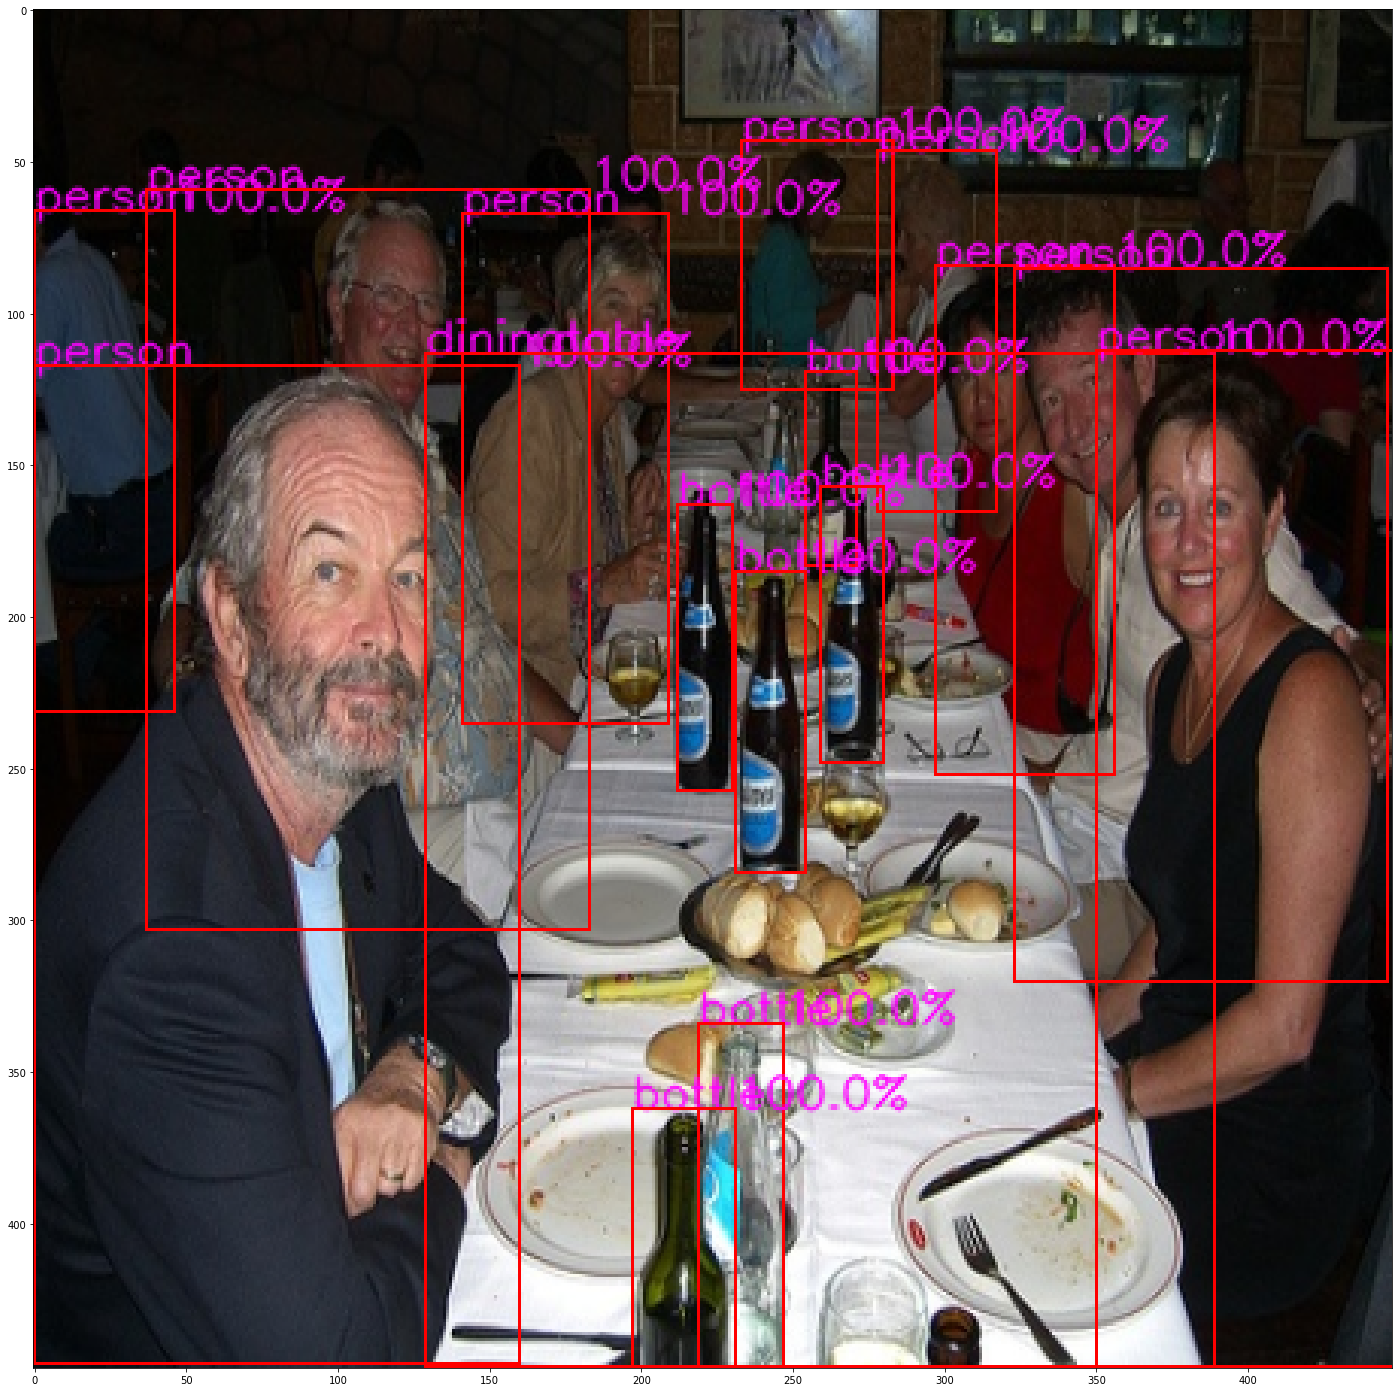

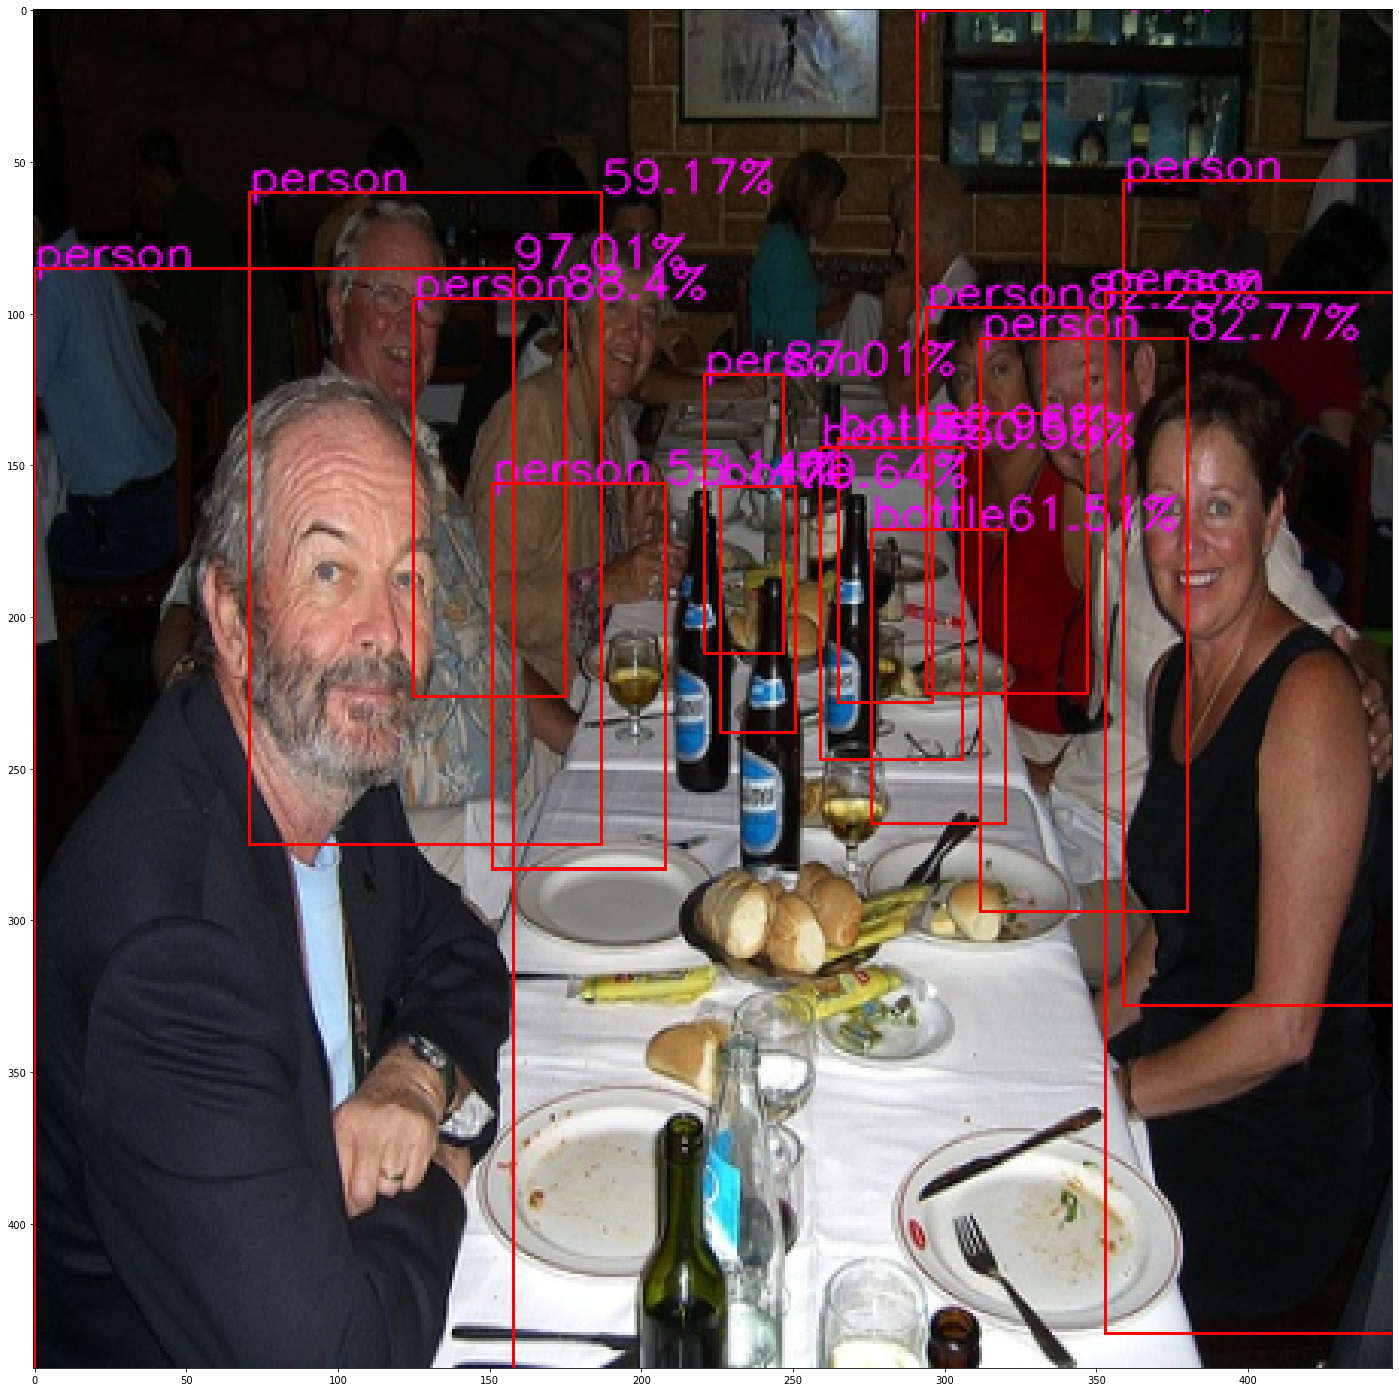

In [81]:
names = []
inputs = torch.zeros((100,3,448,448)).to(device)
labels = torch.zeros((100,7,7,30)).to(device)
data = train

for i in range(100):
    
    idx = torch.randint(low = 0,high = len(data),size = (1,)).item()

    names.append(data[idx]['name'])

    inputs[i] = data[idx]["image"]

    labels[i] = data[idx]["annotation"]


model.eval()
preds = model(inputs/255).view(labels.shape).detach()

preds_dict = toDict(names,preds)
true_dict = toDict(names,labels,True)


print(yoloLoss(labels.float(),preds.float(),5,0.5))

sample ={"image":data[idx]["image"],"annotation":labels[99]}
out = showSample(sample,0.7)
sample ={"image":data[idx]["image"],"annotation":preds[99]}
out = showSample(sample,0.5)

In [82]:
new_preds_dict = get_batch_statistics(preds_dict,true_dict)

332 9800


Computing ap: 100%|████████████████████████████████████████████████████████████████| 9796/9796 [01:54<00:00, 85.93it/s]


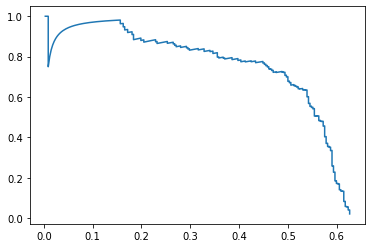

In [86]:
result = ap(true_dict,new_preds_dict)

In [88]:
print(f"AP : {round(result[2],2)}%")

AP : 49.25%
